In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
all_logical_error_rates_CNN_G = jnp.load("data/environmentCNN_CNN-G_error_rates_p01_nu500.npy")
all_logical_error_rates_CNN_B = jnp.load("data/environmentCNN_CNN-B_error_rates_p01_nu500.npy")
all_logical_error_rates_PML = jnp.load("data/environmentPML_error_rates_p01_nu500.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


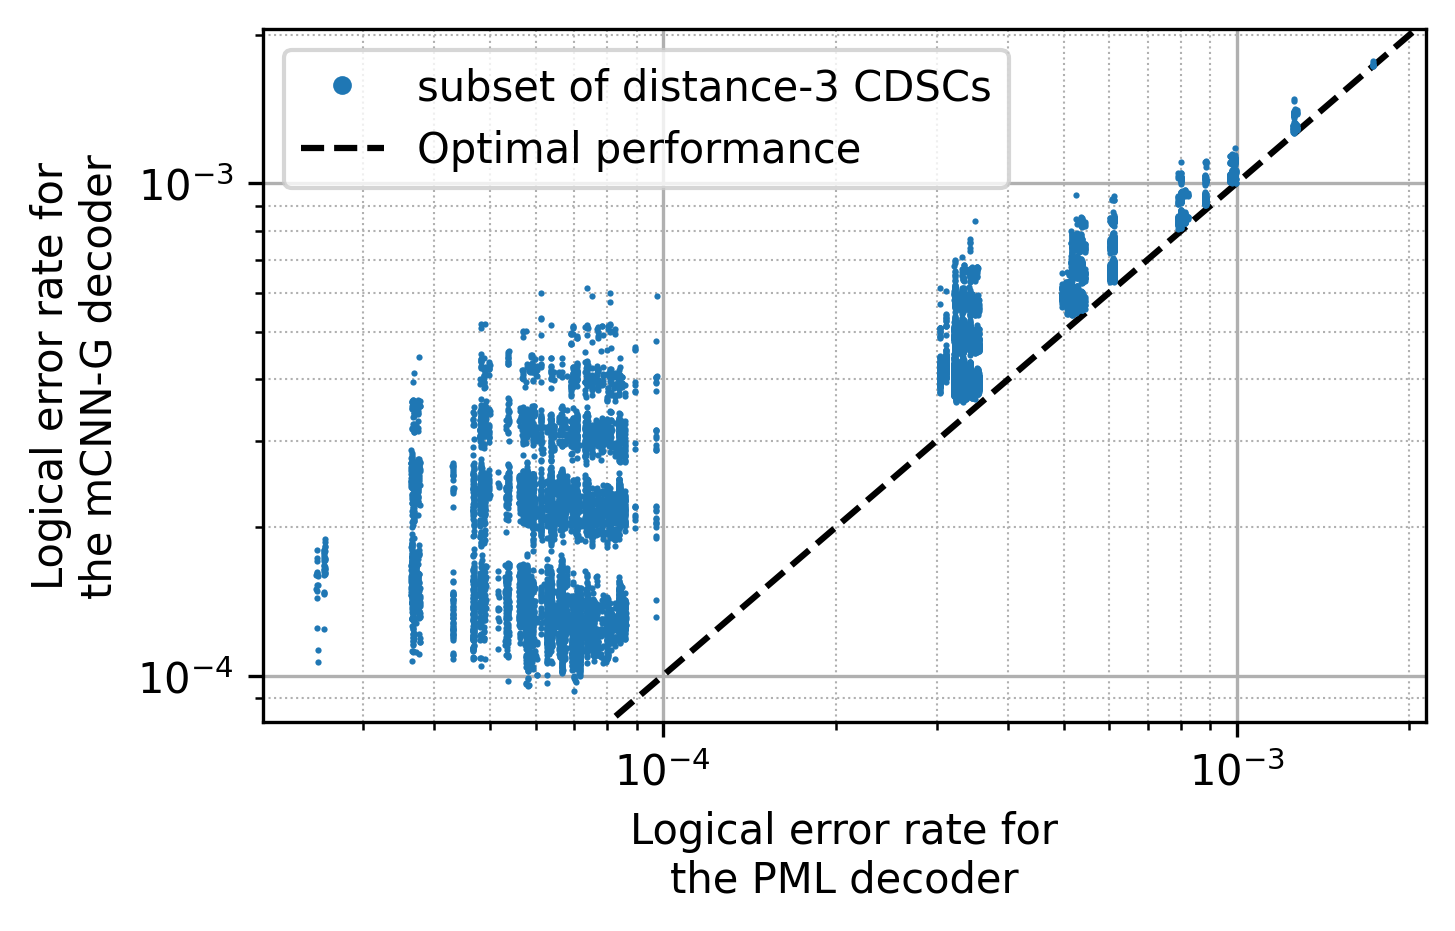

In [49]:
plt.figure(figsize=(5,3), dpi=300)

# Set rasterized to True to keep pdf size manageable
plt.plot(
    all_logical_error_rates_PML,
    all_logical_error_rates_CNN_G,
    '.',
    label="subset of distance-3 CDSCs",
    ms=3, mew=0,
    zorder=3, 
    rasterized=True
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Logical error rate for\nthe PML decoder")
plt.ylabel("Logical error rate for\nthe mCNN-G decoder")

xlims = plt.gca().get_xlim()
ylims = plt.gca().get_ylim()
plt.plot(
    [min(xlims[0], ylims[0])*.9, max(xlims[1], ylims[1])*1.1],
    [min(xlims[0], ylims[0])*.9, max(xlims[1], ylims[1])*1.1],
    'k--',
    label="Optimal performance",
    zorder=2
)
plt.xlim(xlims)
plt.ylim(ylims)

plt.legend(markerscale=3)

plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', linewidth=0.5)

plt.savefig("figs/LER-across_deformations-PML_vs_mCNN-G.pdf", dpi=600, bbox_inches='tight')
plt.savefig("figs/LER-across_deformations-PML_vs_mCNN-G.eps", dpi=600, bbox_inches='tight')
plt.savefig("figs/LER-across_deformations-PML_vs_mCNN-G.png", dpi=300, bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


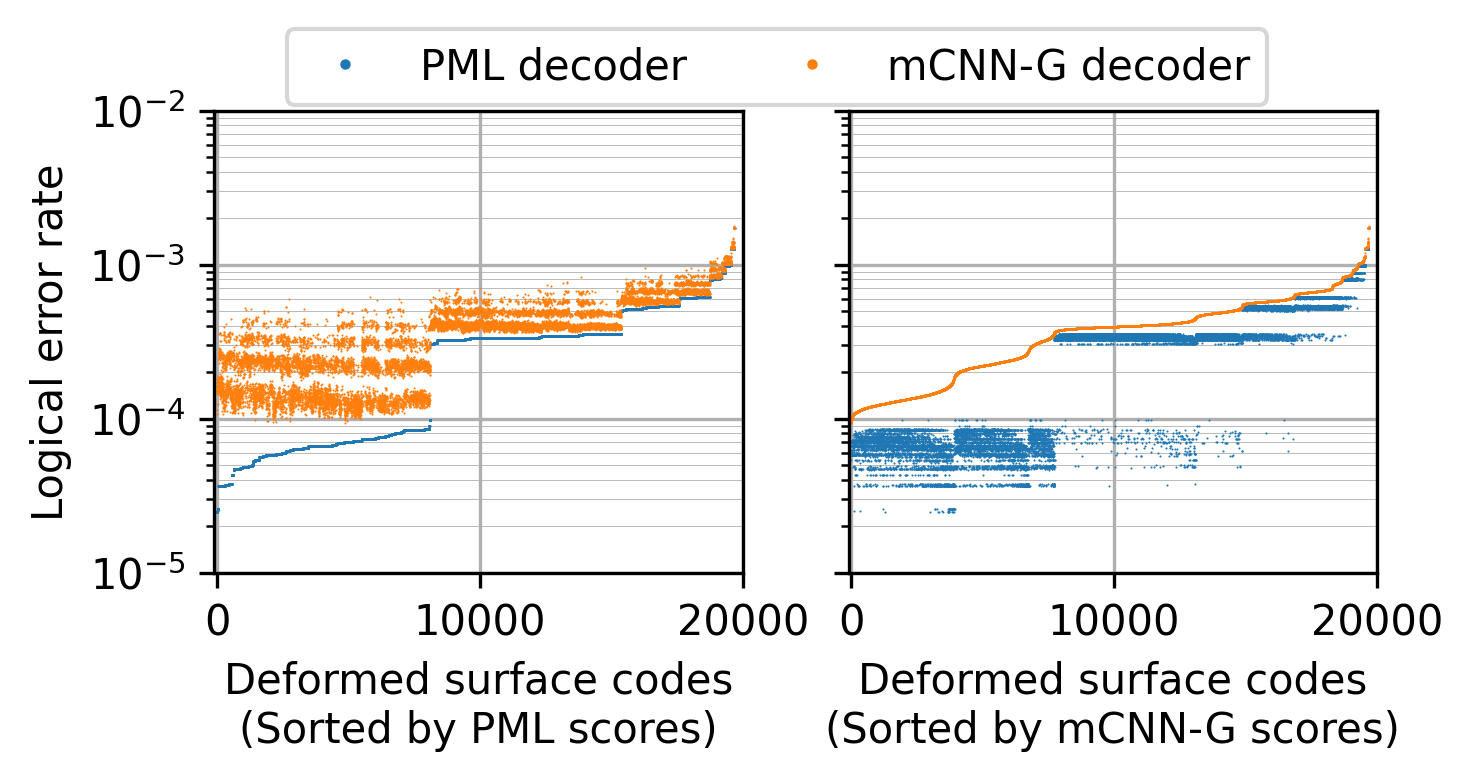

In [48]:
sorted_order = [
    all_logical_error_rates_PML.argsort(),
    all_logical_error_rates_CNN_G.argsort()
]
name = "LER-Comparison-both"

fig, axs = plt.subplots(1, 2, dpi=300, figsize=(5,2), sharey=True)
for i in range(2):
    # Set rasterized to True to keep pdf size manageable
    axs[i].plot(all_logical_error_rates_PML[sorted_order[i]], '.', ms=1, mew=0, label="PML decoder", rasterized=True)
    axs[i].plot(all_logical_error_rates_CNN_G[sorted_order[i]], '.', ms=1, mew=0, label="mCNN-G decoder", rasterized=True)
    axs[i].set_yscale('log')
    axs[i].set_xlabel(f"Deformed surface codes\n(Sorted by {['PML', 'mCNN-G'][i]} scores)")
    axs[i].set_xlim(-100,20000)
    axs[i].set_ylim(1E-5,1E-2)
    axs[i].grid()
    axs[i].grid(which="minor", lw=0.2)
    if i == 0:
        axs[i].set_ylabel("Logical error rate")
        fig.legend(markerscale=5, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.savefig(f"figs/{name}.eps", dpi=600, bbox_inches='tight')
plt.savefig(f"figs/{name}.pdf", dpi=600, bbox_inches='tight')
plt.savefig(f"figs/{name}.png", dpi=300, bbox_inches='tight')

plt.show()

In [39]:
deformations_included = jnp.array([0,2,3])
m = deformations_included.shape[0] # Number of diferent deformations per qubit
n = 9 # Number of data qubits that can have deformations
all_deformations = jnp.zeros(shape=(m**n, n), dtype=jnp.int32) + jnp.arange(0, m**n)[:, None]
all_deformations = (all_deformations // m**jnp.arange(0, n)) % m
all_deformations = deformations_included[all_deformations]
all_deformations

Array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 3, ..., 3, 3, 3],
       [2, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int32)

In [40]:
counts = jnp.array([(all_deformations == d).sum(axis=1) for d in deformations_included])
counts

Array([[9, 8, 8, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 8, 8, 9]], dtype=int32)

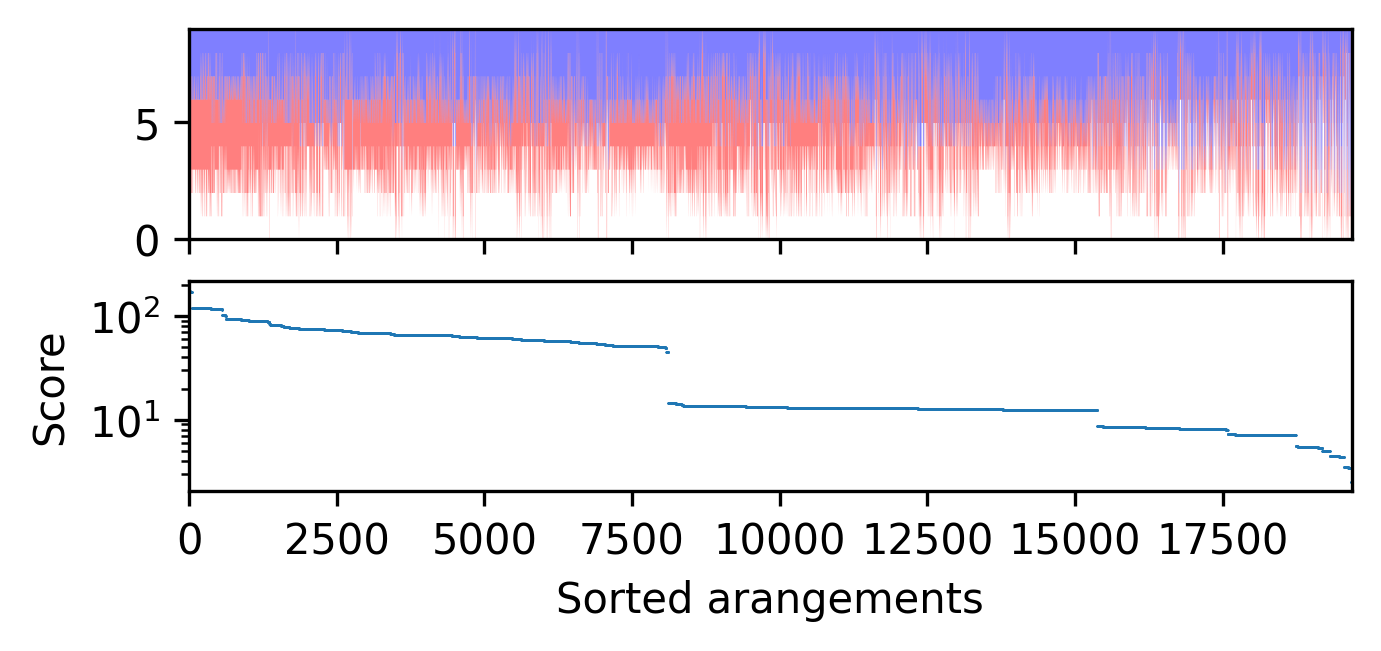

In [43]:
order = all_logical_error_rates_PML.argsort()

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300, figsize=(5,2), sharex=True)

baseline = jnp.zeros(shape=counts.shape[1])
for count, color in zip(counts[:, order], ['white', 'red', 'blue']):
    ax1.fill_between(
        jnp.arange(0, m**n),
        baseline,
        baseline+count,
        alpha=0.5,
        color=color,
        lw=0
    )
    baseline = baseline + count
ax1.set_ylim(0, 9)

ax2.plot(jnp.arange(0, m**n), -jnp.log10(.99) / all_logical_error_rates_PML[order], '.', ms=1, mew=0, label="PML decoder")
ax2.set_ylabel("Score")
ax2.set_xlabel("Sorted arangements")
ax2.set_xlim(0, m**n)
ax2.set_yscale('log')

plt.show()